   ***IMPLEMENTATION DE L'ALGORITHME XGBoost***

*EXPLICATION DES DONNEES*

Nous travaillons avec des données sur le Cancer du sein à la ville de Coimbra (en Portugal). Des caractéristiques cliniques ont été observées et mesurées chez 64 patientes atteintes d'un cancer du sein et 52 témoins sains. Il existe 10 prédicteurs, tous quantitatifs, et une variable dépendante binaire (1 pour personne saine et 2 pour patiente atteinte), indiquant l' abscence ou la présence d'un cancer du sein. Les prédicteurs sont des données et des paramètres anthropométriques qui peuvent etre recueillies lors des analyses sanguines. Les parametres sont : 

Age(ans) : age de la personne ,

BMI(kg/m²) : indice de masse de corporelle ,

Glucose(mg/dL) : taux de glucose dans le sang ,

Insuline(µU/mL) : taux d'insuline dans le sang ,

HOMA : indice permettant de mettre en évidence une résistance insulinique ,

Leptine(ng/mL) : taux de leptine , 

Adiponectine(µg/mL) : taux d'adiponectine ,

Résistine(ng/mL) : taux de résistine ,

MCP-1(pg/dL) : taux de Protéine Chimio attractive des Monocytes 


***Importation des modules***

In [139]:
import numpy as np
import pandas as pd

***Importation et Affichage des données***

In [140]:
data = pd.read_csv('dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


***Preprocessing***

In [141]:
#check sur les infos générales 
print('le nombre de lignes est' ,data.shape[0])
print('le nombre de colonnes est' ,data.shape[1])

le nombre de lignes est 116
le nombre de colonnes est 10


In [142]:
#Check sur les types de variables
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [143]:
#Check des valeus nulles
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [144]:
#Check des valeurs manquantes
data.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [145]:
#On remplace la valeur 1, indicatif des personnes saines, par la valeur 0 
# et la valeur 2 ,indicatif des personnes atteintes, par la valeur 1
data['Classification'] = data['Classification'].replace(1,0)
data['Classification'] = data['Classification'].replace(2,1)
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


In [146]:
#Determination de X et Y
Y = data['Classification']
X = data.drop(['Classification'], axis=1)

***Normalisation***

In [147]:
from sklearn.preprocessing import StandardScaler
X_cr = StandardScaler().fit_transform(X)

In [148]:
#Vérification
print(X_cr.mean(axis=0))
print(X_cr.std(axis=0))

[ 1.49305855e-16 -6.12177933e-16  1.99074473e-16  3.15839309e-17
  1.99074473e-16  1.33992434e-16  2.20130427e-17  2.73727401e-16
 -1.28249901e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


***Modèle XGBoost***

In [149]:
#Split des données avec 70% de train et 30% de test 
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X_cr , Y , test_size=0.3 , random_state=12,stratify=Y)

In [150]:
#Installation du module xgboost
!pip install xgboost


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [151]:
print(sum(Y)/len(Y))
print(sum(Y_train)/len(Y_train))
print(sum(Y_test)/len(Y_test))

0.5517241379310345
0.5555555555555556
0.5428571428571428


 Le paramètre **objective** définit la fonction de perte à minimiser:
     **binary:logistic**: Pour la classification binaire, renvoie la probabilité prédite (et non la classe)

In [159]:
#Appel de la fonction
from xgboost import XGBClassifier
#Instanciation du modèle
boost = XGBClassifier(objective='binary:logistic',seed=42)
#Fitting du modèle
boost.fit(X_train,Y_train)
#Prédiction
pred_boost = boost.predict(X_test)

***Evaluation du modèle XGBoost***

In [160]:
#Calcul de accurancy
from sklearn.metrics import accuracy_score
boost_acc = accuracy_score(Y_test, pred_boost)
print('accuracy du modèle xgboost est', boost_acc)

accuracy du modèle xgboost est 0.7714285714285715


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


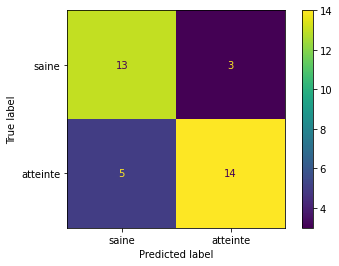

In [161]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boost,X_test,Y_test,
                      values_format='d',
                      display_labels=['saine','atteinte'])

In [163]:
#Visionnage des autres métriques d'évaluation
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_boost))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.82      0.74      0.78        19

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35



***Optimisation du modèle XGBoosting***

In [157]:
from sklearn.model_selection import GridSearchCV
#Paramètres du grid
params =[
    {'n_estimators':[1,2,3,5,6]}, #Nombre de tours de boost
    {'max_depth':[2,4,5,6,2]} #profondeur maximale de l'arborescence
]
#Initialisation du modèle
boost = XGBClassifier()
best_model = GridSearchCV(boost, params,cv=5, verbose=10)
best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START n_estimators=1.............................................
[CV 1/5; 1/10] END ..............n_estimators=1;, score=0.706 total time=   0.0s
[CV 2/5; 1/10] START n_estimators=1.............................................
[CV 2/5; 1/10] END ..............n_estimators=1;, score=0.562 total time=   0.0s
[CV 3/5; 1/10] START n_estimators=1.............................................
[CV 3/5; 1/10] END ..............n_estimators=1;, score=0.688 total time=   0.0s
[CV 4/5; 1/10] START n_estimators=1.............................................
[CV 4/5; 1/10] END ..............n_estimators=1;, score=0.562 total time=   0.0s
[CV 5/5; 1/10] START n_estimators=1.............................................
[CV 5/5; 1/10] END ..............n_estimators=1;, score=0.812 total time=   0.0s
[CV 1/5; 2/10] START n_estimators=2.............................................
[CV 1/5; 2/10] END ..............n_estimators=2;

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'n_estimators': [1, 2, 3, 5, 6]},
                         {'max_depth': [2, 4, 5, 6, 2]}],
             verbose=10)

In [158]:
print('le best paramètre du modèle de XGBoost est', best_model.best_params_)
print('le best score du modèle XGBoost  est',best_model.best_score_)

le best paramètre du modèle de XGBoost est {'n_estimators': 6}
le best score du modèle XGBoost  est 0.7036764705882353


***Comparaison avec les autres modèles de classification***

**Modèle K-NN**

In [99]:
#Application du modèle K-NN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
pred= model.predict(X_test)
taux = accuracy_score(pred, Y_test)
print('accuracy du modele de K-NN est',taux)

accuracy du modele de K-NN est 0.8285714285714286


In [100]:
#Visionnage des autres métriques d'évaluation
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.81      0.89      0.85        19

    accuracy                           0.83        35
   macro avg       0.83      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



In [101]:
#Optimisation du modele K-NN
from sklearn.model_selection import GridSearchCV
#parametres du grid
params =[
    {'n_neighbors':[1,2,3,5,6]},
    {'leaf_size':[2,4,5,6,2]}
]
#Initialisation du modèles
model=KNeighborsClassifier()
best_model = GridSearchCV(model, params,cv=5, verbose=10)
best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START n_neighbors=1..............................................
[CV 1/5; 1/10] END ...............n_neighbors=1;, score=0.647 total time=   0.0s
[CV 2/5; 1/10] START n_neighbors=1..............................................
[CV 2/5; 1/10] END ...............n_neighbors=1;, score=0.438 total time=   0.0s
[CV 3/5; 1/10] START n_neighbors=1..............................................
[CV 3/5; 1/10] END ...............n_neighbors=1;, score=0.812 total time=   0.0s
[CV 4/5; 1/10] START n_neighbors=1..............................................
[CV 4/5; 1/10] END ...............n_neighbors=1;, score=0.625 total time=   0.0s
[CV 5/5; 1/10] START n_neighbors=1..............................................
[CV 5/5; 1/10] END ...............n_neighbors=1;, score=0.812 total time=   0.0s
[CV 1/5; 2/10] START n_neighbors=2..............................................
[CV 1/5; 2/10] END ...............n_neighbors=2;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 5, 6]},
                         {'leaf_size': [2, 4, 5, 6, 2]}],
             verbose=10)

In [102]:
print('le best paramètre du modèle K-NN est', best_model.best_params_)
print('le best score du modèle K-NN est',best_model.best_score_)

le best paramètre du modèle K-NN est {'n_neighbors': 5}
le best score du modèle K-NN est 0.7029411764705882


**Modèle LOGISTIC REGRESSION**

In [103]:
#Application du modèle Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
pred_lr= lr.predict(X_test)
lr_acc =accuracy_score(Y_test,pred_lr)
print('accuracy du modele de Logistic Regression est ',lr_acc)

accuracy du modele de Logistic Regression est  0.6285714285714286


In [104]:
#Visionnage des autres métriques d'évaluation
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.67      0.63      0.65        19

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.63      0.63      0.63        35



In [105]:
#Optimisation du modèle de Logistic Regression
from sklearn.model_selection import GridSearchCV
#parametres du grid
params =[
    {'max_iter':[1,12,3,5,100]},
    {'n_jobs':['None']}
]
#Initialisation du modèles
lr = LogisticRegression()
best_model = GridSearchCV(lr, params,cv=5, verbose=10)
best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_iter=1..................................................
[CV 1/5; 1/6] END ...................max_iter=1;, score=0.412 total time=   0.0s
[CV 2/5; 1/6] START max_iter=1..................................................
[CV 2/5; 1/6] END ...................max_iter=1;, score=0.750 total time=   0.0s
[CV 3/5; 1/6] START max_iter=1..................................................
[CV 3/5; 1/6] END ...................max_iter=1;, score=0.625 total time=   0.0s
[CV 4/5; 1/6] START max_iter=1..................................................
[CV 4/5; 1/6] END ...................max_iter=1;, score=0.438 total time=   0.0s
[CV 5/5; 1/6] START max_iter=1..................................................
[CV 5/5; 1/6] END ...................max_iter=1;, score=0.812 total time=   0.0s
[CV 1/5; 2/6] START max_iter=12.................................................
[CV 1/5; 2/6] END ..................max_iter=12;,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [1, 12, 3, 5, 100]},
                         {'n_jobs': ['None']}],
             verbose=10)

In [107]:
print('le best paramètre du modèle Logistic Regression est', best_model.best_params_)
print('le best score du modèle Logistic Regression est',best_model.best_score_)

le best paramètre du modèle Logistic Regression est {'max_iter': 3}
le best score du modèle Logistic Regression est 0.6669117647058823


**Modèle Naive Bayesien**

In [117]:
#Application du modèle Naives Bayesien
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
pred_gnb= gnb.predict(X_test)
gnb_acc =accuracy_score(Y_test,pred_gnb)
print('accuracy du modele de naive bayes est',gnb_acc)

accuracy du modele de naive bayes est 0.6


In [118]:
#Visionnage des autres métriques d'évaluation
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.54      0.94      0.68        16
           1       0.86      0.32      0.46        19

    accuracy                           0.60        35
   macro avg       0.70      0.63      0.57        35
weighted avg       0.71      0.60      0.56        35



In [119]:
#Optimisation du modèle de Naive Bayes
from sklearn.model_selection import GridSearchCV
#Paramètres du grid
params =[
    {'var_smoothing':[0.82e-16,0.15e-16,0.13e-16,0.12e-16]}
]
#Initialisation du modèle
gnb = GaussianNB()
best_model = GridSearchCV(gnb, params,cv=5, verbose=10)
best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START var_smoothing=8.2e-17.......................................
[CV 1/5; 1/4] END ........var_smoothing=8.2e-17;, score=0.471 total time=   0.0s
[CV 2/5; 1/4] START var_smoothing=8.2e-17.......................................
[CV 2/5; 1/4] END ........var_smoothing=8.2e-17;, score=0.688 total time=   0.0s
[CV 3/5; 1/4] START var_smoothing=8.2e-17.......................................
[CV 3/5; 1/4] END ........var_smoothing=8.2e-17;, score=0.688 total time=   0.0s
[CV 4/5; 1/4] START var_smoothing=8.2e-17.......................................
[CV 4/5; 1/4] END ........var_smoothing=8.2e-17;, score=0.688 total time=   0.0s
[CV 5/5; 1/4] START var_smoothing=8.2e-17.......................................
[CV 5/5; 1/4] END ........var_smoothing=8.2e-17;, score=0.438 total time=   0.0s
[CV 1/5; 2/4] START var_smoothing=1.5e-17.......................................
[CV 1/5; 2/4] END ........var_smoothing=1.5e-17;,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': [8.2e-17, 1.5e-17, 1.3e-17,
                                            1.2e-17]}],
             verbose=10)

In [120]:
print('le best paramètre du modèle Naives Bayesien est', best_model.best_params_)
print('le best score du modèle Naives Bayesien est',best_model.best_score_)

le best paramètre du modèle Naives Bayesien est {'var_smoothing': 8.2e-17}
le best score du modèle Naives Bayesien est 0.5941176470588235


**Arbre de Décision**

In [121]:
#Application du modèle arbre de décision
from sklearn.tree import DecisionTreeClassifier 
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred_dtc= dtc.predict(X_test)
dtc_acc =accuracy_score(Y_test,pred_dtc)
print('accuracy est du modèle arbre de decision est',dtc_acc)

accuracy est du modèle arbre de decision est 0.6857142857142857


In [122]:
#Visionnage des autres métriques d'évaluation
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.75      0.63      0.69        19

    accuracy                           0.69        35
   macro avg       0.69      0.69      0.69        35
weighted avg       0.70      0.69      0.69        35



In [123]:
#Optimisation du modèle arbre de décision
from sklearn.model_selection import GridSearchCV
#Paramètres du grid
params =[
    {'criterion' : ["gini", "entropy"]},
    {'splitter' : ["best", "random"]}
]
#Initialisation du modèle
dtc=DecisionTreeClassifier()
best_model = GridSearchCV(dtc, params,cv=5, verbose=10)
best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START criterion=gini..............................................
[CV 1/5; 1/4] END ...............criterion=gini;, score=0.529 total time=   0.0s
[CV 2/5; 1/4] START criterion=gini..............................................
[CV 2/5; 1/4] END ...............criterion=gini;, score=0.750 total time=   0.0s
[CV 3/5; 1/4] START criterion=gini..............................................
[CV 3/5; 1/4] END ...............criterion=gini;, score=0.625 total time=   0.0s
[CV 4/5; 1/4] START criterion=gini..............................................
[CV 4/5; 1/4] END ...............criterion=gini;, score=0.625 total time=   0.0s
[CV 5/5; 1/4] START criterion=gini..............................................
[CV 5/5; 1/4] END ...............criterion=gini;, score=0.812 total time=   0.0s
[CV 1/5; 2/4] START criterion=entropy...........................................
[CV 1/5; 2/4] END ............criterion=entropy;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'splitter': ['best', 'random']}],
             verbose=10)

In [124]:
print('le best paramètre du modèle arbre de décision est', best_model.best_params_)
print('le best score du modèle arbre de décision est',best_model.best_score_)

le best paramètre du modèle arbre de décision est {'criterion': 'gini'}
le best score du modèle arbre de décision est 0.6683823529411764


***Interprétation***

Après évaluation et optimisation de chaque modèle, nous avons eu comme best_score pour :

***XGBoost*** : 0.7036764705882353% 

***K-NN*** :   0.7029411764705882%

***Logistic Regression*** : 0.6669117647058823%

***Naives Bayesien*** : 0.5941176470588235%

***Arbre de Décision*** : 0.6683823529411764%

Donc on peut déduire que le modèle ***XGBoost*** peut potentiellement etre utilisé comme biomarqueur du cancer du sein.
